# Workshop on modelling metabolism

<div>
    <div style="float:right">
        <center>A typical metabolic network</center>
        <img src="./Data/Lee_ComplexMetabolism.png" width="600pt" align="center">
    </div>
<div style="text-align:justify">Metabolism is complex and highly interconnected. Mathematical models help us study metabolism while accounting for some of its complexities. 
Depending on the size of the system, the aim of the study, availability of kinetic data and computing power available; one can use kinetic modelling or constraint-based modelling to study metabolism. In this exercise we will be exploring how constraint-based modelling can be used to study metabolism in biological systems.</div>
</div>

### Constraint-based modelling (CBM) and Flux Balance Analysis (FBA)

<div style="text-align:justify">In Constraint-based modelling,  
(a) the stoichiometry of metabolites involved in reaction that make up the biological system, and  
(b) the upper and lower limits (or constraints) on metabolic fluxes (if known)  
are used to generate a set of linear equations that when solved reveal a solution space for all feasible flux distributions in the biological system.
</div>
<div style="text-align:justify">
FBA is the most popular approach in CBM. In FBA, in addition to the above requirements, an expression representing the biological objective of the system is defined. Unicellular organism typically aim to simply grow and multiply. When modelling these systems, a biomass composition is experimentally determined and the information is used to add a reaction that drains metabolites and macromolecules in the same proportion from the system. This reaction is called the "Biomass" reaction. Any flux through the biomass reaction represents the growth by cell division. Specialized tissue in multicellular organisms on the other hand may have completely different purpose. For example, the purpose of mesophyl cells that make up most of the leaves in plants is to generate sugar and amino acids for the plant using energy from the sun. The aim of cortical cells of mature roots on the other hand would be to uptake nutrients from the soil and load into the xylem to distributed to the rest of the plant. In these cases, an equation representing the specific objective need to be defined.
</div>
<div style="text-align:justify">
Once an appropriate objective function is determined, linear programming is used to identify a point in the solution space with optimal value for the objective expression.
</div>


To read more about FBA check out ([Orth, Thiele and Palsson, 2010](http://www.nature.com/nbt/journal/v28/n3/abs/nbt.1614.html))

### E. Coli
E. Coli is the most widely studied prokaryote. It is naturally found in mammal intestines but due to its short replication time and the amount of information known about it, it is relatively easy to bioengineer into a cellular factory to produce many desirable proteins and chemicals. For example, E. coli were used in industrial fermentation processes to produce some of the first synthetic human insulin. Today we'll be exploring a model of E. Coli metabolism

## Exercise 1: Study differences in <i>E. coli</i> metabolism under aerobic and anaeobic conditions
<div style="float:right">
    <center>Brief description of Ecoli Escher model</center>
    <img src="./Data/EcoliEscherFBAStructure.png" width="900pt" align="center">
</div> 

#### A) Using Escher-FBA (20 mins)
Escher-FBA is an interactive pathway visualization tool for on-the-fly flux balance analysis (FBA) calculations ([Rowe, Palsson & King, 2018](https://www.doi.org/10.1186/s12918-018-0607-5))
 
1) Go to https://sbrg.github.io/escher-fba/#/app    
    - A quick brief of the model is provided in the figure below
    - Nodes represent metabolites and edges represent reactions
    - Note that all reactions that bring metabolites into the system and out of it (also referred to as exchange or boundary reactions) start with an "EX_" tag
    - Note that the model loads with a default flux distribution. The default glucose uptake (EX_glc_e) in this model is -10 (negative flux here suggests uptake of glucose)  

2) Play around with the constraints on each reaction and observe how the different metabolic pathways interact. Take note of all the inputs and outputs to the system.

3) Find out if there are any constraints on O2 uptake (EX_o2_e) in the model and determine the O2 influx in the default flux distribution
    - Quick way to track down a reaction on Escher-FBA is to use "Ctrl+F" and then type in the ID of the reaction you are looking for. In this case EX_o2_e.
    - Mouse over the reaction ID and note down the upper and lower bound. The default upper and lower bounds on the flux is 1000 and -1000 respectively. In most models this means there are no limits (or constraints) imposed on the flux.
    - Mousing over the reaction ID can also reveal the current flux through the reaction.
    - Note down the influxes and outfluxes of the model in aerobic conditions (all reactions starting with "EX_").

4) What happens if the model does not have access to O2 in its environment? (as anaerobic scenario)
    - Mouse over the EX_o2_e reaction and use the sliders or value-entry-box to set the lower bound of the reaction to 0
    - Note the change in flux. 
    - Mouse over reactions to learn more about the reactions.
    - Note down the influxes and outfluxes of the model in anaerobic conditions.
    - Compare the ATP and NAD(P)H bugdets in each scenario **
    


#### B) Using cobrapy library (10 mins)

COBRA is a framework for constraint based modelling and cobrapy is its implementation in python ([Ebrahim et. al., 2013](https://doi.org/10.1186/1752-0509-7-74)).

1. Import cobra in python and create an ecoli model, and check constraints on glucose and O2 uptake
    - import cobra and create a model as shown below

In [15]:
#import cobrapy library
import cobra
from UsefulFunctions import *

#create an ecoli model
from cobra.io import load_model
Model = load_model("e_coli_core")


- Here "Model" is a cobra `model`object
        - use `Model.reactions` to retrieve a list of all reactions in a `model` object
        - use `Model.metabolites` to retrieve a list of all metabolites in a `model` object
        - use `Model.reactions.get_by_id("EX_glc__D_e")` to retrieve `reaction` object representing uptake of glucose

In [13]:
rxn1 = Model.reactions.get_by_id("EX_glc__D_e")
rxn2 = Model.reactions.get_by_id("EX_o2_e")

   - Here"rxn" is a `reaction` object, 
        - `rxn.reaction` can be used to retrieve the chemical reaction equation
        - `rxn.metabolites` can be used to retrieve a python dictionary of all metabolites involved and their stoichiometry
        - `rxn.lower_bound` holds the lower bound of the reaction and `rxn.upper_bound` holds the upper bound of the reaction. Alternately `rxn.bounds` can retrieve the flux constraints (both lower and upper bounds) of the reaction

In [14]:
print("Printing reaction equation and bounds")
print(rxn1.id+"\t"+rxn1.reaction)
print(rxn1.bounds)
print("----------------")
print(rxn2.id+"\t"+rxn2.reaction)
print(rxn2.bounds)

Printing reaction equation and bounds
EX_glc__D_e	glc__D_e <=> 
(-10.0, 1000.0)
----------------
EX_o2_e	o2_e <=> 
(-1000.0, 1000.0)


- We can set the model objective by specifying a model reaction and whether we want to maximise or minimise the flux through the reaction.

In [4]:
Model.objective = 'BIOMASS_Ecoli_core_w_GAM'
Model.objective.direction = 'max'

2. Run parsimonious FBA or pFBA to model metabolism in aerobic conditions.

    - In addition to regular FBA, pFBA performs a seconds optimization to minimize the total flux in the system [Lewis et. al., 2010](https://www.doi.org/10.1038/msb.2010.47). This minimization of sum of fluxes is considered as a proxy for efficient enzyme usage and since evolution drives biological systems to be more efficient in the evnironments they evolve in, pFBA in many cases have been known to generate flux distributions similar to that observed in real systems.
    - Then use `Model.summary()` to get an idea of how the system is operating

In [16]:
#run pFBA (FBA finds a point in the solution space where objective is maximized with minimial flux in the system, a proxy for efficient enzyme usage)
from cobra.flux_analysis import pfba
sol = pfba(Model)

In [16]:
#check summary of flux distributions
Model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,6,100.00%
nh4_e,EX_nh4_e,4.765,0,0.00%
o2_e,EX_o2_e,21.8,0,0.00%
pi_e,EX_pi_e,3.215,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-22.81,1,100.00%
h2o_e,EX_h2o_e,-29.18,0,0.00%
h_e,EX_h_e,-17.53,0,0.00%


3. Run pFBA to model metabolism in anaerobic conditions.

    - Set o2 uptake flux to 0.
    - Run pFBA
    - Use `Model.summary()` to get an idea of how the system is operating

In [17]:
Model.reactions.get_by_id("EX_o2_e").lower_bound = 0

In [18]:
sol2 = pfba(Model)

In [19]:
Model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,0.3782,1,0.63%
glc__D_e,EX_glc__D_e,10,6,99.37%
h2o_e,EX_h2o_e,7.116,0,0.00%
nh4_e,EX_nh4_e,1.154,0,0.00%
pi_e,EX_pi_e,0.7786,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
ac_e,EX_ac_e,-8.504,2,33.11%
etoh_e,EX_etoh_e,-8.279,2,32.23%
for_e,EX_for_e,-17.8,1,34.66%
h_e,EX_h_e,-30.55,0,0.00%


4. What changes to the flux distribution do you see between the two conditions (aerobic and anaerobic)? 
    - Which pathways are most affected?
    - At what point does the system switch from aerobic to anaerobic metabolism. Why is it happening at this point?

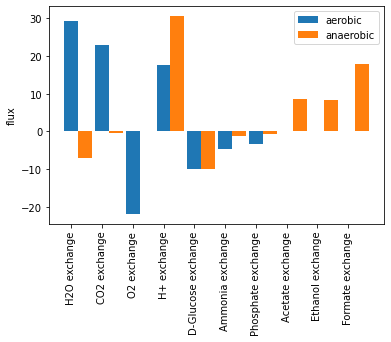

In [5]:
plotBoundary(Model,[sol,sol2],solutionNames=['aerobic','anaerobic'])

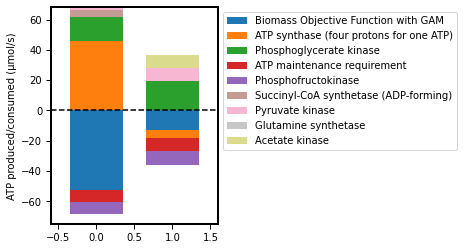

In [45]:
plotATPBudget(Model,[sol,sol2])

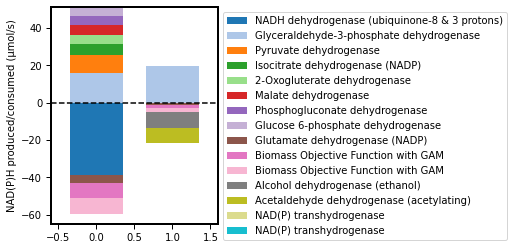

In [44]:
plotNADBudget(Model,[sol,sol2])

## Exercise 2: Optimizing for biomass
A) (20 mins) The model objective is to optimize for biomass. Have a look another look at the inputs and outputs and loosen the constraints on the other potential bacterial substrates to see which combination results in the fastest growing bacterial colony (results in the greatest biomass flux). Which pathways do these substrates feed into? Have a look at where they are contributing to the ATP/reducing power (NADH/NADPH) in the cell. Why are some more desirable than others?

B) (30 mins) Aldehydes in general are toxic to microorganisms due to their high reactivity. They have been shown to inhibit growth of E. Coli colonies. Additionally, E. Coli grow optimally in isotonic media - that is a solution in which the dissolved substrates do not exert any more osmotic pressure than the contents of the cell. In hypertonic media, where the concentration of substrates is too high for E. Coli, they begin to dehydrate which slows down their growth. We will assume for the purposes of this exercise that no acetaldehyde (acald) is the optimal amount of acetaldehyde for E. Coli growth and also that an isotonic solution means that the combined inwards flux of all potential substrates can be no more than 10 µmol/s. What is the new optimal flux for the system?

C) (40 mins) How would this change if we wanted our E. Coli colony to produce something else? What is the optimal medium to grow them in to produce ethanol? What if we wanted to maximise the ratio of ethanol to succinate?


### HINTS

In [8]:
# We can list all input and output reactions in the model to see what options the E. Coli have for food using 
for rxn in Model.boundary:
    print(rxn.id, rxn.reaction)

EX_ac_e ac_e --> 
EX_acald_e acald_e --> 
EX_akg_e akg_e --> 
EX_co2_e co2_e <=> 
EX_etoh_e etoh_e --> 
EX_for_e for_e --> 
EX_fru_e fru_e --> 
EX_fum_e fum_e --> 
EX_glc__D_e glc__D_e <=> 
EX_gln__L_e gln__L_e --> 
EX_glu__L_e glu__L_e --> 
EX_h_e h_e <=> 
EX_h2o_e h2o_e <=> 
EX_lac__D_e lac__D_e --> 
EX_mal__L_e mal__L_e --> 
EX_nh4_e nh4_e <=> 
EX_o2_e o2_e <=> 
EX_pi_e pi_e <=> 
EX_pyr_e pyr_e --> 
EX_succ_e succ_e --> 


In [9]:
# To limit the absolute flux of all exchange reactions to 10 µmol/s, we can use the following code.
Maximum_exchange = 10
coefficients = dict()
for rxn in Model.boundary:
    coefficients[rxn.forward_variable] = 1.
    coefficients[rxn.reverse_variable] = 1.
constraint = Model.problem.Constraint(Maximum_exchange, lb=0, ub=100)
Model.add_cons_vars(constraint)
Model.solver.update()
constraint.set_linear_coefficients(coefficients=coefficients)

# How would we limit only the incoming reactions? NOTE: For these kinds of constraints, we usually ignore O2, CO2, and water (H2O) and assume they are in abundance

# We can remove the above constraint with:
Model.remove_cons_vars(constraint)

# See https://cobrapy.readthedocs.io/en/latest/constraints_objectives.html#Constraints for more information.

In [27]:
for rxn in Model.boundary:
    print(rxn.id, rxn.lower_bound, rxn.upper_bound,'         ',rxn.reaction)
    rxn.lower_bound=-1000
    rxn.upper_bound=1000

EX_ac_e 0.0 1000.0           ac_e --> 
EX_acald_e 0.0 1000.0           acald_e --> 
EX_akg_e 0.0 1000.0           akg_e --> 
EX_co2_e -1000.0 1000.0           co2_e <=> 
EX_etoh_e 0.0 1000.0           etoh_e --> 
EX_for_e 0.0 1000.0           for_e --> 
EX_fru_e 0.0 1000.0           fru_e --> 
EX_fum_e 0.0 1000.0           fum_e --> 
EX_glc__D_e -10.0 1000.0           glc__D_e <=> 
EX_gln__L_e 0.0 1000.0           gln__L_e --> 
EX_glu__L_e 0.0 1000.0           glu__L_e --> 
EX_h_e -1000.0 1000.0           h_e <=> 
EX_h2o_e -1000.0 1000.0           h2o_e <=> 
EX_lac__D_e 0.0 1000.0           lac__D_e --> 
EX_mal__L_e 0.0 1000.0           mal__L_e --> 
EX_nh4_e -1000.0 1000.0           nh4_e <=> 
EX_o2_e 0 1000.0           o2_e --> 
EX_pi_e -1000.0 1000.0           pi_e <=> 
EX_pyr_e 0.0 1000.0           pyr_e --> 
EX_succ_e 0.0 1000.0           succ_e --> 


In [28]:
sol3=pfba(Model)
Model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
acald_e,EX_acald_e,1000,2,31.82%
fru_e,EX_fru_e,399.7,6,38.16%
fum_e,EX_fum_e,101.2,4,6.44%
glc__D_e,EX_glc__D_e,8.375,6,0.80%
gln__L_e,EX_gln__L_e,10.45,5,0.83%
glu__L_e,EX_glu__L_e,201.9,5,16.06%
mal__L_e,EX_mal__L_e,92.61,4,5.89%
o2_e,EX_o2_e,500,0,0.00%
pi_e,EX_pi_e,150.3,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux


In [32]:
Model.objective = 'EX_etoh_e'
sol4=pfba(Model)
Model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
acald_e,EX_acald_e,1000,2,60.71%
glc__D_e,EX_glc__D_e,2.232,6,0.41%
gln__L_e,EX_gln__L_e,0.3128,5,0.05%
glu__L_e,EX_glu__L_e,6.045,5,0.92%
h2o_e,EX_h2o_e,388.3,0,0.00%
lac__D_e,EX_lac__D_e,403.3,3,36.73%
mal__L_e,EX_mal__L_e,9.752,4,1.18%
pi_e,EX_pi_e,4.5,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
akg_e,EX_akg_e,-17.01,5,2.62%


# Useful functions

In [34]:
Model.metabolites.succ_e

Metabolite identifier,succ_e
Name,Succinate
Memory address,0x07fa0c98b92e0
Formula,C4H4O4
Compartment,e
In 3 reaction(s),"SUCCt2_2, SUCCt3, EX_succ_e"
